### Quasispecies equations

$\dot{x_0} = a_0 (1-u)x_0 - \phi x_0$

$\dot{x_i} = a_{i-1} u x_{i-1} - a_i x_i (1-u) - \phi x_i$

$\dot{x_n} = a_{n-1} u x_{n-1} - a_n x_n - \phi x_n$

$ \phi = \sum_{i=0}^n{a_i x_i}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, widgets

### Define the system of quasispecies equations

In [2]:
def quasispecies_eqns(x, t, u, a):
    
    # Number of quasispecies equations
    n = len(x)-1
    
    # Define Phi
    phi = np.dot(a,x)

    # Append each ODE to a list
    dx = []
    dx.append(a[0]*(1-u)*x[0] - phi*x[0])                                         # First equation
    for i in range(1,n):dx.append(a[i-1]*u*x[i-1] + a[i]*x[i]*(1-u) - phi*x[i])   # i-th equations
    dx.append(a[n-1]*u*x[n-1] + a[n]*x[n] - phi*x[n])                             # Last equation
    
    return dx

### Study the long term behavior

In [3]:
def quasispecies_model(u, a1, a2, a3, a4, a5, a6, a7, a8, a9, tm):
    # Growth rates
    a = [1, a1, a2, a3, a4, a5, a6, a7, a8, a9]

    # Initial population frequency with only the unaltered present
    x0 = [0] * len(a)
    x0[0] = 1
    
    # Time window
    t = np.linspace(0, tm, 1000)
    x = odeint(quasispecies_eqns,x0,t, args=(u, a))

    plt.figure(figsize=(20,7))
    for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
    plt.xlabel('t', fontsize = 'x-large')
    plt.ylabel('Species frequency', fontsize = 'x-large')
    plt.xticks(fontsize = 'x-large')
    plt.yticks(fontsize = 'x-large')
    plt.title('Quasispecies system', fontsize = 'x-large')
    plt.legend(loc=(1.04,0), fontsize = 'x-large')
    plt.grid()
    plt.show()
    
interact(quasispecies_model,
         u  = widgets.FloatSlider(value= 0.07, min=0.01, max=0.99, step=0.01, continuous_update=False),
         a1 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a2 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a3 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a4 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a5 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a6 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a7 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a8 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         a9 = widgets.FloatSlider(value= 1, min=0.01, max=5, step=0.01, continuous_update=False),
         tm = widgets.IntSlider(value= 250, min=10, max=1000, continuous_update=False, description='time'));

interactive(children=(FloatSlider(value=0.07, continuous_update=False, description='u', max=0.99, min=0.01, st…

### Small differences in $a_k$ will keep the complete domination of the last mutant

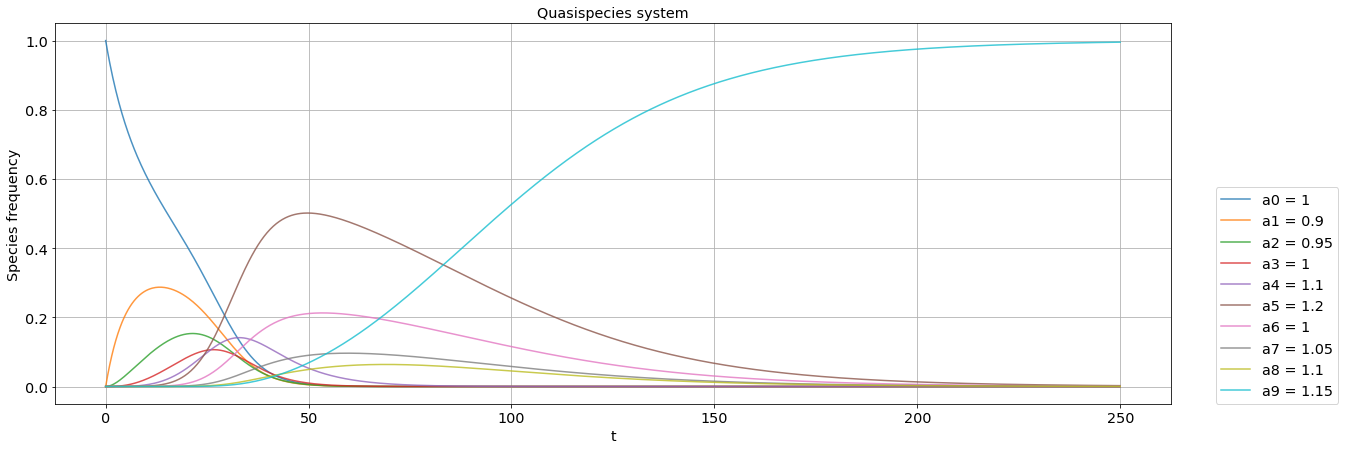

In [4]:
# Growth rates
a = [1, 0.9, 0.95, 1, 1.1, 1.2, 1, 1.05, 1.1, 1.15]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 250, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20,7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()

### If the differenc bitween the $\max(a_k)$ and $a_n$ is small the last species will dominate even if there is a hard obstacles to overcome.

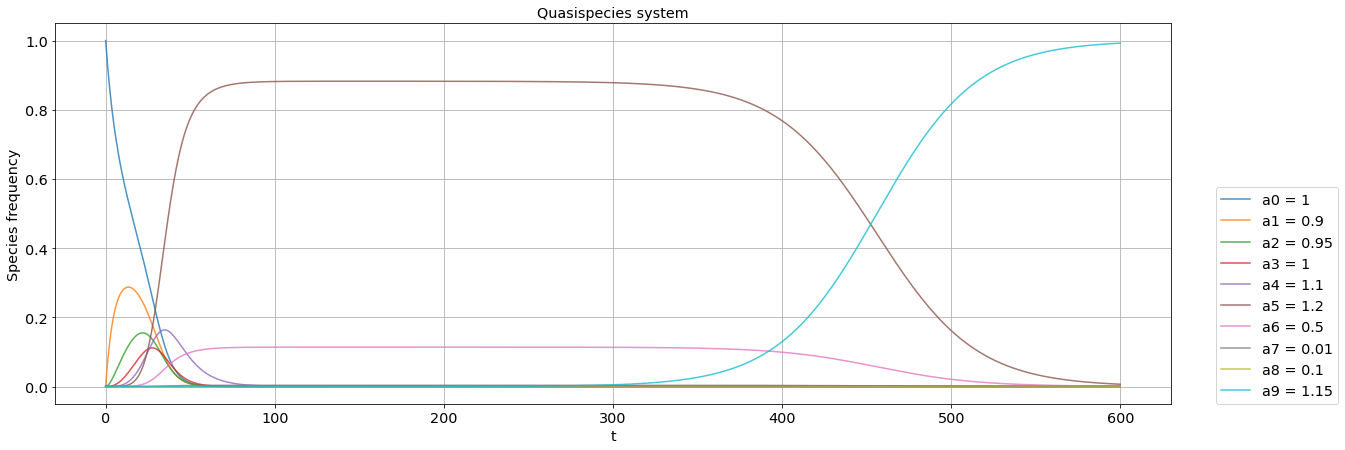

In [5]:
# Growth rates
a = [1, 0.9, 0.95, 1, 1.1, 1.2, 0.5, 0.01, 0.1, 1.15]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 600, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20,7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()

### If the differenc bitween the $\max(a_k)$ and $a_n$ is high enough coexistance is expected.

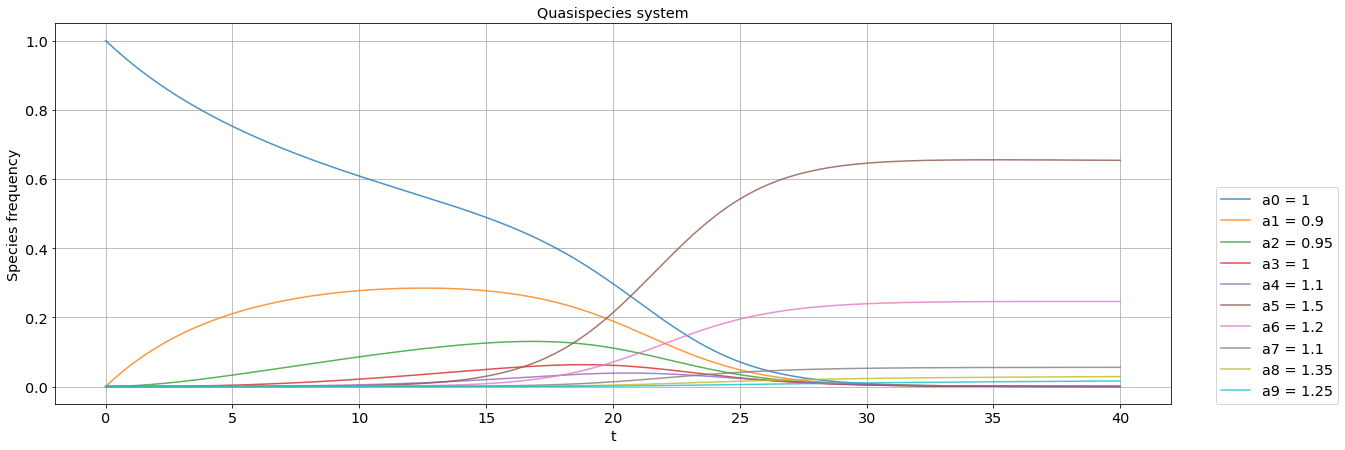

In [6]:
# Growth rates
a = [1, 0.9, 0.95, 1, 1.1, 1.5, 1.2, 1.1, 1.35, 1.25]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 40, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20, 7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()

### If there are two growth rates equal to $\max(a_k)$ they will coexist while the last will have higher frequency

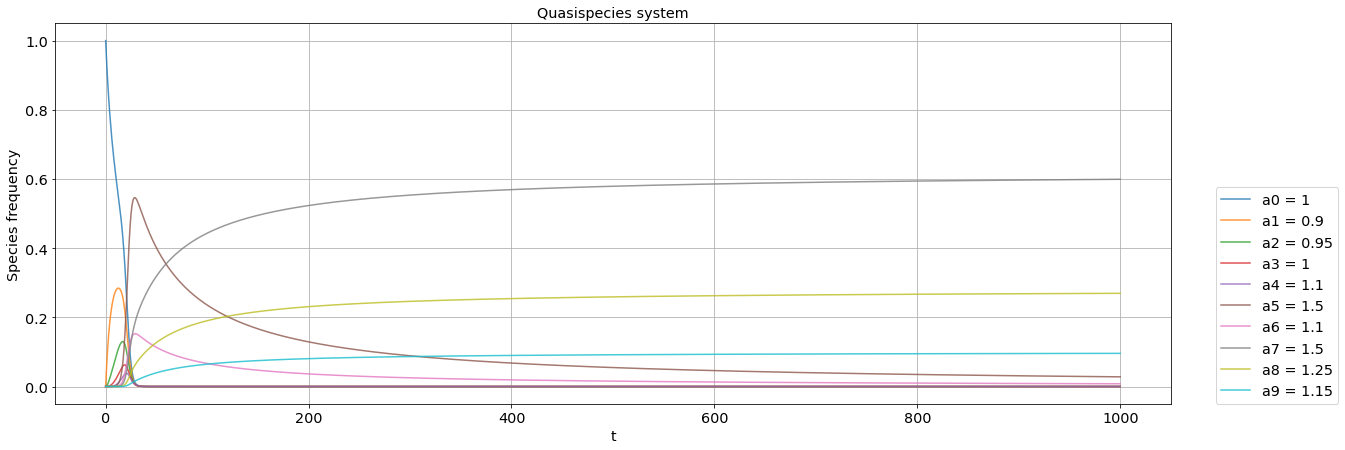

In [7]:
# Growth rates
a = [1, 0.9, 0.95, 1, 1.1, 1.5, 1.1, 1.5, 1.25, 1.15]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 1000, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20, 7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()

### Even if the differenc bitween the $\max(a_k)$ and $a_n$ is very high coexistance is still there but you might not reach the last mutation

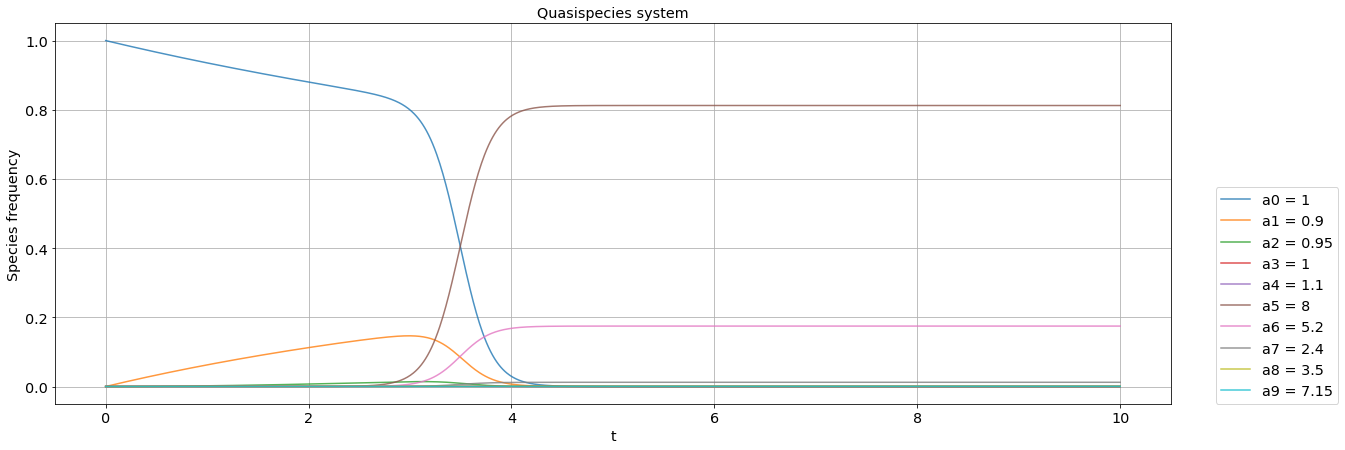

In [8]:
# Growth rates
a = [1, 0.9, 0.95, 1, 1.1, 8, 5.2, 2.4, 3.5, 7.15]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 10, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20, 7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()

### All the mutants before the $\max(a_k)$ will extinct while the comperable mutants after will coexist but still you can benefite from being present early even if highr fittness mutations came if its not close the highest fittness mutation.

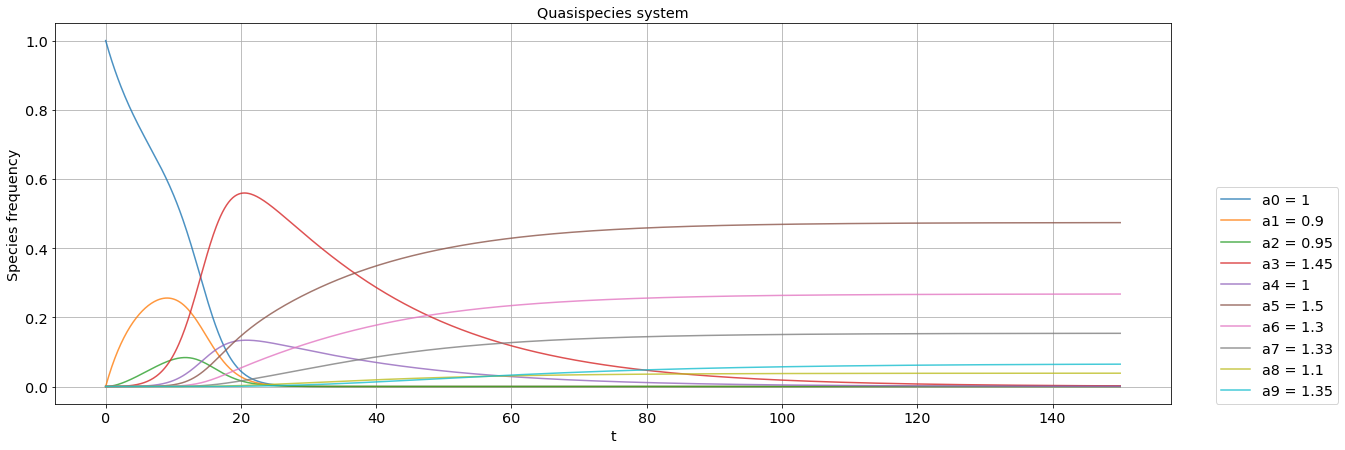

In [9]:
# Growth rates
a = [1, 0.9, 0.95, 1.45, 1, 1.5, 1.3, 1.33, 1.1, 1.35]

# Initial population frequency with only the unaltered present
x0 = [0] * len(a)
x0[0] = 1

# Hit rate
u = 0.07

# Time window
t = np.linspace(0, 150, 1000)
x = odeint(quasispecies_eqns, x0, t, args=(u, a))

plt.figure(figsize=(20, 7))
for i, r in enumerate(a): plt.plot(t, x[:, i], label=f'a{i} = {r}' , alpha=0.8)
plt.xlabel('t', fontsize = 'x-large')
plt.ylabel('Species frequency', fontsize = 'x-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Quasispecies system', fontsize = 'x-large')
plt.legend(loc=(1.04,0), fontsize = 'x-large')
plt.grid()
plt.show()